In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(6497, 13)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# data preprocessing
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# checking null value in dataset
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
data.dropna(inplace = True)

In [8]:
# checking null value in dataset
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.size

84019

In [10]:
# quality value counts
data['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [11]:
# checking correlation of day data
corr = data.corr()
corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444637
citric acid             0.084926
free sulfur dioxide     0.054924
sulphates               0.039054
pH                      0.018403
residual sugar         -0.034654
total sulfur dioxide   -0.041598
fixed acidity          -0.076174
chlorides              -0.200553
volatile acidity       -0.266677
density                -0.304447
Name: quality, dtype: float64

# Visulization

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

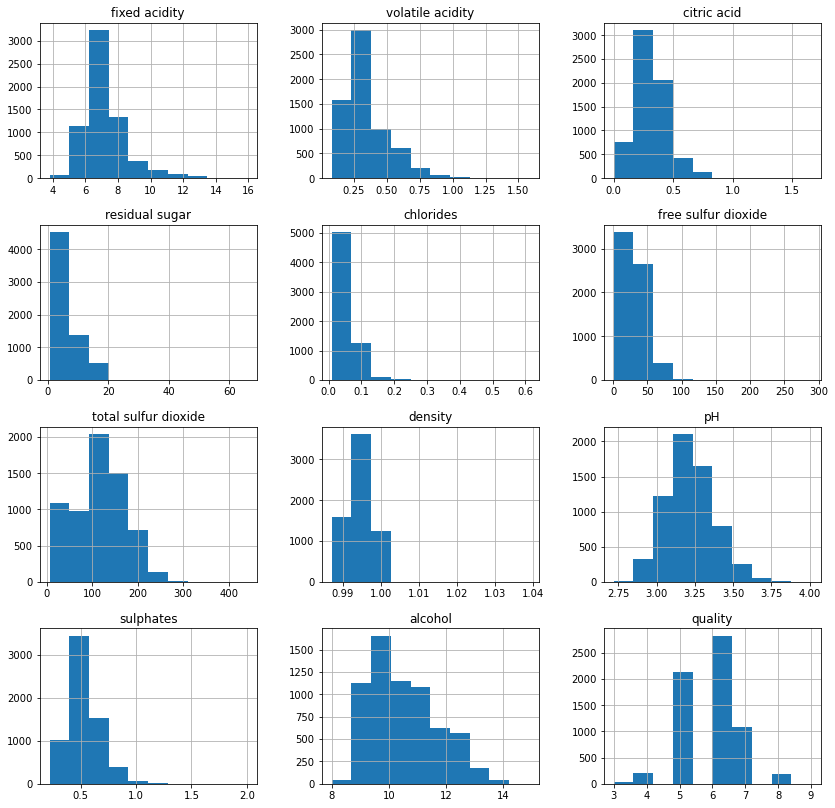

In [12]:
data.hist(figsize=(14,14))

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

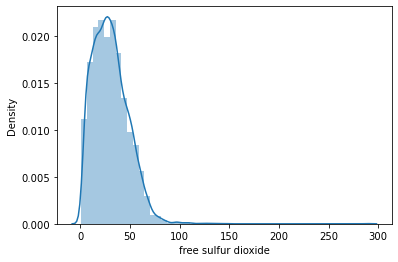

In [13]:
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

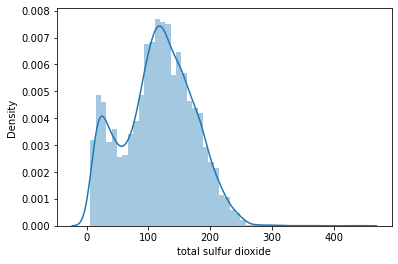

In [24]:
sns.distplot(data['total sulfur dioxide'])

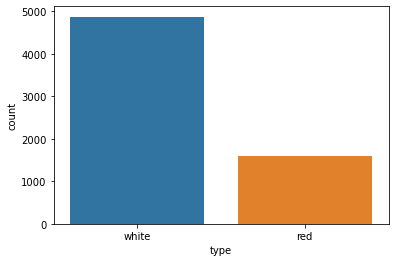

In [15]:
sns.countplot(data['type'])
plt.show()

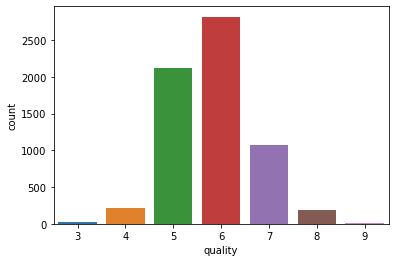

In [16]:
sns.countplot(data['quality'])
plt.show()

<AxesSubplot:xlabel='type', ylabel='alcohol'>

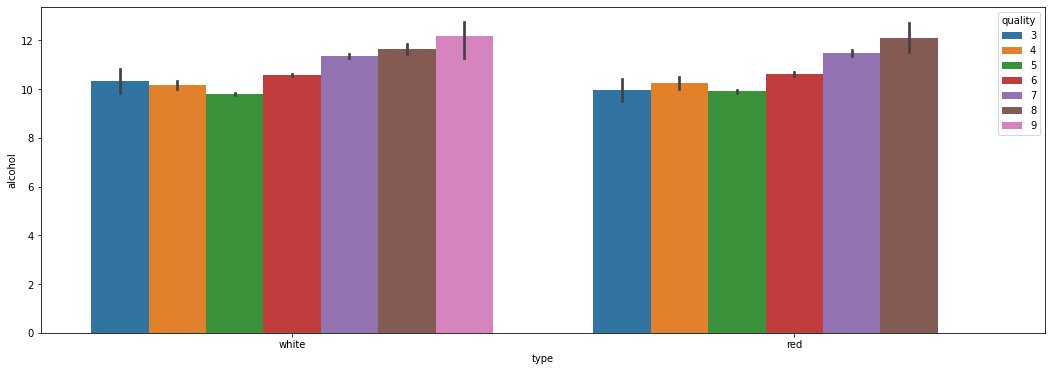

In [17]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['type'],data['alcohol'],hue=data['quality'])

In [ ]:
# heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), linewidths=.01, annot = True, cmap='GnBu')
plt.show()

# Data preprocessing

In [ ]:
# train_test_split
x = data.drop(columns=['type','quality'])
y = data['quality']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
# Logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:
y_test

In [ ]:
y_predict

In [ ]:
pd.crosstab(y_test,y_predict)

In [ ]:
confusion_matrix(y_test,y_predict)

In [ ]:
from sklearn.metrics import precision_score,recall_score,classification_report

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:
pd.crosstab(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
# RandomForestClassifier 
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:
pd.crosstab(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
# ExtraTreeClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:
pd.crosstab(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
# MPL Classifier
model = MLPClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:

pd.crosstab(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
# KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

In [ ]:

pd.crosstab(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

In [ ]:

plt.figure(figsize = (9,5))
sns.heatmap(matrix,annot=True)

In [ ]:
print("accuracy:",accuracy_score(y_test,y_predict))

In [ ]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "ETC": ExtraTreesClassifier(),
          "MPL": MLPClassifier()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();